In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import statistics
%matplotlib inline

In [2]:
df = pd.read_excel('Douban.xlsx')

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
df_clean = df.drop_duplicates(subset='电影名')

In [5]:
needed = ['(尚未上映)', '(目前无 )', '(评价人数不足)']
df_clean = df_clean[df_clean['评分'].isin(needed)]

In [6]:
df_clean.shape

(6589, 6)

In [7]:
df_clean = df_clean.reset_index()

In [8]:
#df_clean.drop(df.index[0:13], inplace=True)

In [13]:
errors = []
def info_douban(row):
    print("processing", row['index'])
    try:
        response = requests.get(row['链接'])
        doc = BeautifulSoup(response.text, "html.parser")
        for item in doc.find_all('span', attrs={'class': 'pl'}):
            if item.text == 'IMDb链接:':
                link = item.next_sibling.next_sibling['href']      
        ratingCount = doc.find('span', attrs={'property': 'v:votes'}).text
        rating = doc.find('strong', attrs={'property': 'v:average'}).text
        return pd.Series({'imdb_link': link, '评价人数_更新': ratingCount, '评分_更新': rating})
    except:
        print('Error found on index',row.电影名)
        errors.append(row.电影名)
        return pd.Series({})

In [14]:
%%time
df2 = df_clean.apply(info_douban, axis=1).join(df_clean)

processing 0
Error found on index "ExtremeChampionshipWrestling"
processing 0
Error found on index "ExtremeChampionshipWrestling"
processing 2
Error found on index "WWEMondayNightRAW"Episodedated11Decembe
processing 3
Error found on index "WWEMondayNightRAW"Episodedated11June200
processing 4
Error found on index "WWEMondayNightRAW"Episodedated13Novembe
processing 5
Error found on index "WWEMondayNightRAW"Episodedated18Decembe
processing 6
Error found on index "WWEMondayNightRAW"Episodedated18June200
processing 7
Error found on index "WWEMondayNightRAW"Episodedated1January2
processing 8
Error found on index "WWEMondayNightRAW"Episodedated20Novembe
processing 9
Error found on index "WWEMondayNightRAW"Episodedated27Novembe
processing 10
Error found on index "WWEMondayNightRAW"Episodedated4December
processing 11
Error found on index "WWESaturdayNight'sMainEvent"Episode#2.1
processing 12
Error found on index "WWESaturdayNight'sMainEvent"Episode#2.2
processing 13
Error found on index "WWESat

Error found on index Daniel-DerZauberer
processing 624
Error found on index Darcey'sBalletHeroes
processing 625
Error found on index DarceyBussell:ABallerina'sLife
processing 626
Error found on index DarceyBussell:LookingForMargot
processing 627
Error found on index DarkNature
processing 640
Error found on index DC超级朋友第一季
processing 641
Error found on index DC超能妹子第一季
processing 642
Error found on index DC超能妹子第二季
processing 643
Error found on index DeadlineGallipoli
processing 644
Error found on index DeadlyDesire
processing 645
Error found on index DeadlyLittleChristmas
processing 647
Error found on index DenseFearBloodline
processing 649
Error found on index Dernièresnouvellesducosmos
processing 650
Error found on index DerTagdesSpatzen
processing 651
Error found on index Desecration
processing 652
Error found on index Design:e2
processing 653
Error found on index DieHabsburger-EineeuropäischeFamilienges
processing 654
Error found on index DieLaughing
processing 658
Error found on ind

Error found on index LOL积极的生活
processing 941
Error found on index LongStoryShort
processing 942
Error found on index Lost
processing 943
Error found on index LouisTheroux:TransgenderKids
processing 949
Error found on index LunchMeat
processing 953
Error found on index Lysistrata
processing 954
Error found on index Mafamillet'adoredéjà
processing 955
Error found on index Magnus
processing 956
Error found on index MarchingtoZion
processing 957
processing 958
Error found on index MarizaandtheStoryofFado
processing 965
Error found on index Memoriadesmemoriada
processing 966
Error found on index MenofIdeas
processing 968
Error found on index MichelFoucault:BeyondGoodandEvil
processing 969
processing 973
Error found on index MiracleoftheHudsonPlaneCrash
processing 976
Error found on index MMAドキュメンタリーHYBRID
processing 978
Error found on index Moiy'enavouloirdessous
processing 981
Error found on index Moyarusalka,moyaLorelyay
processing 985
Error found on index MrsAmworth
processing 987
Error 

Error found on index SweetJustice
processing 1251
Error found on index SylvieGuillematWork
processing 1260
Error found on index The100YearsShow
processing 1261
Error found on index TheAlchemist
processing 1263
processing 1265
Error found on index TheBestofRaw:15thAnniversary
processing 1267
Error found on index TheBritishesSeason1
processing 1268
Error found on index TheBrotherhood
processing 1269
Error found on index TheCreepingGarden
processing 1270
Error found on index TheCrystalBall
processing 1271
Error found on index TheCuckooClocksofHell
processing 1272
Error found on index TheCultureShow:TheUnstoppableThomasHeath
processing 1273
Error found on index TheDeerslayer
processing 1274
Error found on index TheDemonsinMyHead
processing 1275
processing 1276
Error found on index TheEroticEmpire
processing 1277
Error found on index TheFantasticalWorldofHormoneswithProfess
processing 1280
Error found on index TheFutureofFashionwithAlexaChung
processing 1282
Error found on index TheGeniusof

Error found on index WWERAWEpisodedated19November2007
processing 1459
Error found on index WWERAWEpisodedated1December2008
processing 1460
Error found on index WWERAWEpisodedated1October2007
processing 1461
Error found on index WWERAWEpisodedated1September2008
processing 1462
Error found on index WWERAWEpisodedated20April2009
processing 1463
Error found on index WWERAWEpisodedated20October2008
processing 1464
Error found on index WWERAWEpisodedated21April2008
processing 1465
Error found on index WWERAWEpisodedated21January2008
processing 1466
Error found on index WWERAWEpisodedated21July2008
processing 1467
Error found on index WWERAWEpisodedated21May2007
processing 1468
Error found on index WWERAWEpisodedated22December2008
processing 1469
Error found on index WWERAWEpisodedated22January2007
processing 1470
Error found on index WWERAWEpisodedated22October2007
processing 1471
Error found on index WWERAWEpisodedated22September2008
processing 1472
Error found on index WWERAWEpisodedated23

Error found on index WWESmackdownEpisodedated4January2008
processing 1578
Error found on index WWESmackdownEpisodedated5December2008
processing 1579
Error found on index WWESmackdownEpisodedated6February2009
processing 1580
Error found on index WWESmackdownEpisodedated6June2008
processing 1581
Error found on index WWESmackdownEpisodedated6March2009
processing 1582
Error found on index WWESmackdownEpisodedated7March2008
processing 1583
Error found on index WWESmackdownEpisodedated7November2008
processing 1584
Error found on index WWESmackdownEpisodedated8May2009
processing 1585
Error found on index WWESmackdownEpisodedated9January2009
processing 1586
Error found on index WWESmackdownEpisodedated9May2008
processing 1588
Error found on index WWESurvivorSeries(2008)
processing 1589
Error found on index WWETheMondayNightWar
processing 1590
Error found on index WWEWrestleManiaX-Seven
processing 1591
Error found on index WWE：布洛克莱斯纳吃.睡.征服.重复
processing 1592
Error found on index WWE：布洛克莱斯纳：痛苦来袭

processing 2775
Error found on index 丛林之书：起源
processing 2776
Error found on index 丛林乐章
processing 2786
Error found on index 丛林杀机
processing 2801
processing 2809
Error found on index 东京大轰炸
processing 2835
processing 2843
processing 2850
Error found on index 东宫
processing 2851
Error found on index 东宫皇子
processing 2855
Error found on index 东德情结
processing 2860
Error found on index 东方夜谭
processing 2870
Error found on index 东方第一刺客
processing 2871
processing 2887
Error found on index 东陵大盗（三）
processing 2889
Error found on index 东陵大盗（五）
processing 2890
Error found on index 东陵大盗（四）
processing 2891
Error found on index 东风
processing 2935
Error found on index 两性之战
processing 2963
Error found on index 丧尸大战吸血鬼
processing 2967
processing 2970
Error found on index 丧尸黎明
processing 2976
Error found on index 中世纪兵法书
processing 2983
Error found on index 中亚高丽人：不可靠的人
processing 2993
Error found on index 中华之盾
processing 2994
Error found on index 中华之门
processing 3008
Error found on index 中国·皇城北京
processing 3

processing 4546
processing 4550
Error found on index 你看起来很民中
processing 4581
processing 4583
Error found on index 使徒行者2
processing 4588
Error found on index 侍战队真剑者光侍惊变身
processing 4596
Error found on index 侏罗纪世界2
processing 4602
Error found on index 侏罗纪猎物
processing 4615
Error found on index 侠吏飞龙之滴水山庄
processing 4633
Error found on index 侠隐
processing 4636
Error found on index 侦察员的功勋
processing 4637
Error found on index 侦探
processing 4663
Error found on index 俄罗斯之魅：苏联时代的俄国动画
processing 4669
Error found on index 俄罗斯黑手党
processing 4670
Error found on index 俊俏好儿郎
processing 4671
Error found on index 俏女怀春
processing 4675
processing 4690
Error found on index 保持沉默
processing 4709
Error found on index 信仰：艾迪·伊扎德的故事
processing 4723
processing 4725
processing 4735
Error found on index 修羅之介斬魔剣　妖魔伝説
processing 4754
processing 4773
Error found on index 借梦空间
processing 4774
processing 4810
processing 4813
Error found on index 假日少女情
processing 4824
Error found on index 假面忍者赤影Memorial
processing 4829


Error found on index 别抱我，我害怕2:时间
processing 6180
Error found on index 别抱我，我害怕3
processing 6181
Error found on index 别抱我，我害怕4
processing 6182
Error found on index 别抱我，我害怕5
processing 6183
Error found on index 别抱我，我害怕6
processing 6184
Error found on index 别担心！会红的
processing 6188
processing 6194
Error found on index 别看洞里
processing 6204
Error found on index 到底谁是魔鬼
processing 6206
Error found on index 到窑湾之龙鼎风云
processing 6208
Error found on index 制作《杀死比尔2》
processing 6220
Error found on index 制造杀人犯第二季
processing 6229
Error found on index 刺客信条2
processing 6249
Error found on index 刺猬旅馆
processing 6255
Error found on index 刺青IREZUMI
processing 6281
processing 6291
Error found on index 剑侠唐璜
processing 6301
processing 6316
Error found on index 剧场版假面骑士Ghost100眼魂和Ghost命运的瞬间
processing 6320
Error found on index 剧场版假面骑士亚马逊
processing 6324
Error found on index 剧场版兽电战队强龙者GaburinchoofMusic
processing 6326
processing 6329
Error found on index 剧场版奥特曼恐怖的87国道
processing 6332
Error found on index 剧场版杰克奥特曼

Error found on index 另外的世界
processing 7784
Error found on index 另类爱情2独一无二
processing 7785
Error found on index 只为伊折腰
processing 7813
processing 7814
Error found on index 叫我玛丽安娜
processing 7823
Error found on index 可卡危机
processing 7826
Error found on index 可可可心一家人第二部
processing 7827
Error found on index 可可小爱智慧童谣第二季
processing 7830
Error found on index 可怕的感染力-H.P.Lovecraft现象
processing 7833
Error found on index 可怜虫和胡言乱语者
processing 7851
processing 7852
Error found on index 台湾光复
processing 7854
Error found on index 台湾的故事
processing 7855
Error found on index 台湾脚逛大陆
processing 7905
Error found on index 史酷比和WWE的恶魔诅咒
processing 7906
Error found on index 史酷比遭遇Boo兄弟
processing 7911
processing 7915
Error found on index 叶问4
processing 7917
Error found on index 叶问外传
processing 7923
Error found on index 司马迁和武帝　《史记》诞生的秘密
processing 7928
processing 7934
Error found on index 吃货在绵阳
processing 7938
Error found on index 各取应得
processing 7951
Error found on index 合约爱情
processing 7952
processing 7957
proces

Error found on index 复仇的助理
processing 9791
Error found on index 复仇者战队
processing 9795
Error found on index 复仇者联盟3：无限战争
processing 9796
Error found on index 复仇者联盟4
processing 9798
Error found on index 复仇计谋
processing 9807
Error found on index 复活的鲁路修
processing 9815
Error found on index 夏天什么的
processing 9816
processing 9824
Error found on index 夏威夷5O特勤组
processing 9831
Error found on index 夏威夷神探第一季
processing 9851
Error found on index 夏日情动
processing 9865
processing 9866
Error found on index 夏洛克的灵魂
processing 9877
processing 9882
processing 9889
Error found on index 夕化粧
processing 9914
Error found on index 外星来客
processing 9915
Error found on index 外星混血
processing 9922
processing 9938
Error found on index 多米英雄援救武装
processing 9942
processing 9946
Error found on index 多金傻妞体验简单生活之沿途乞讨
processing 9954
Error found on index 夜之旅
processing 9976
processing 9981
Error found on index 夜店奇缘
processing 9984
Error found on index 夜晚的灵魂
processing 10001
processing 10005
processing 10020
processing 10022


Error found on index 妖怪手表：飞天鲸鱼与跨时空大冒险喵！
processing 11585
Error found on index 妖树与松鼠
processing 11586
Error found on index 妖海奇兵
processing 11589
Error found on index 妖猫传
processing 11598
Error found on index 妙先生之雨的孩子
processing 11613
Error found on index 妙探机灵狗
processing 11621
Error found on index 妙计合家欢
processing 11622
processing 11652
processing 11684
Error found on index 威廉戈尔丁之梦
processing 11692
processing 11693
processing 11694
Error found on index 娃娃脸尼尔森
processing 11695
Error found on index 娃娃谷
processing 11702
Error found on index 娜姐背后的男人
processing 11721
Error found on index 婆罗门纳曼
processing 11723
Error found on index 婚事
processing 11735
processing 11758
Error found on index 婷婷
processing 11760
Error found on index 媒体斯坦
processing 11765
Error found on index 嫁人就嫁灰太狼
processing 11776
Error found on index 嫩子
processing 11798
processing 11800
Error found on index 孙中山与辛亥人物
processing 11801
Error found on index 孙中山的葬礼
processing 11805
Error found on index 孙悟空七打九尾狐
processing 11807
Err

Error found on index 屠门镇之复仇之路
processing 13208
Error found on index 山地大猩猩王
processing 13213
Error found on index 山寨罗汉
processing 13225
Error found on index 山水驿站
processing 13227
Error found on index 山洞里的村庄
processing 13229
Error found on index 山灵
processing 13238
Error found on index 山羊奶酪
processing 13239
Error found on index 山羊的故事2
processing 13246
Error found on index 山野追踪
processing 13256
Error found on index 岁月留声：新中国唱片60年
processing 13275
Error found on index 岸边露伴一动不动
processing 13294
Error found on index 巡逻队
processing 13307
Error found on index 工心计
processing 13309
processing 13323
Error found on index 巧克力情缘
processing 13333
Error found on index 巨人：福宾计划
processing 13334
Error found on index 巨变之后：人口为零
processing 13337
processing 13342
Error found on index 巨石阵行动：被埋藏的秘密第一季
processing 13346
Error found on index 巨蟒2
processing 13359
Error found on index 巨齿鲨
processing 13360
processing 13361
Error found on index 巫毒护士
processing 13363
Error found on index 巫毒附体
processing 13378
processin

processing 14964
Error found on index 恐怖塔
processing 14966
Error found on index 恐怖大师
processing 14971
processing 14981
Error found on index 恐怖快递
processing 15009
Error found on index 恐怖直播间
processing 15011
Error found on index 恐怖礼物
processing 15013
processing 15014
Error found on index 恐怖蜘蛛岛
processing 15020
Error found on index 恐怖陷阱
processing 15022
processing 15029
Error found on index 恐惧市
processing 15043
Error found on index 恐龙卡车
processing 15049
Error found on index 恐龙战队兽连者恐龙影像
processing 15050
processing 15057
Error found on index 恒大足校九（七）班
processing 15062
Error found on index 恨之入味
processing 15078
Error found on index 恶人湖
processing 15083
Error found on index 恶劣的行为
processing 15084
Error found on index 恶名昭著.柯尔起源
processing 15087
Error found on index 恶巫
processing 15088
processing 15089
processing 15105
Error found on index 恶梦初醒
processing 15140
processing 15147
Error found on index 恶魔女王
processing 15152
Error found on index 恶魔恋人
processing 15163
Error found on index 恶魔降临
proces

Error found on index 拉撒路效应
processing 16715
Error found on index 拒绝末日
processing 16748
Error found on index 拥挤的房间
processing 16749
processing 16755
processing 16758
Error found on index 拯救孩子们的未来：切断贫困的代际传递
processing 16760
Error found on index 拯救山姆
processing 16763
Error found on index 拯救花园第一季
processing 16767
Error found on index 拳台血泪
processing 16778
Error found on index 拳霸女团
processing 16780
Error found on index 拴线的气球
processing 16783
Error found on index 拼湊青春
processing 16805
Error found on index 持续增加的十万亿国债
processing 16821
Error found on index 挑战极限
processing 16829
Error found on index 挥金如土
processing 16831
Error found on index 挪威旅程：最美航行
processing 16854
Error found on index 捍卫者联盟第一季
processing 16859
Error found on index 捕鱼生死斗
processing 16897
Error found on index 探灵直播
processing 16899
Error found on index 探秘埃及动物木乃伊
processing 16901
Error found on index 探秘致命的海洋力量第一季
processing 16903
Error found on index 探索发现：唐墓壁画中的丝路风情
processing 16905
Error found on index 探索来自巴西的另类之美第一季
processing

Error found on index 昆曲问源
processing 18164
processing 18169
Error found on index 明天开始减肥
processing 18173
Error found on index 明天，你好
processing 18187
Error found on index 明日边缘2
processing 18199
Error found on index 明星的诞生
processing 18204
processing 18205
Error found on index 明月出天山
processing 18222
processing 18229
Error found on index 星兽战队银河人vs百万连者
processing 18230
Error found on index 星兽战队银河人超影像秘密的智慧之果
processing 18258
Error found on index 星核
processing 18267
Error found on index 星游记
processing 18269
Error found on index 星游记第二季
processing 18270
Error found on index 星猫FullHouse
processing 18275
Error found on index 星球大战8
processing 18281
processing 18293
Error found on index 星系保卫战
processing 18295
Error found on index 星舰杀手
processing 18323
Error found on index 星际总动员
processing 18326
Error found on index 星际旅行-下一代-第1季第10集
processing 18327
Error found on index 星际旅行-下一代-第1季第1集
processing 18328
Error found on index 星际旅行-下一代-第1季第3集
processing 18329
Error found on index 星际旅行-下一代-第1季第5集
process

processing 19629
Error found on index 杰夫·哈迪我的人生与法则
processing 19637
processing 19644
Error found on index 杰西卡·琼斯第二季
processing 19645
Error found on index 東京魔悲夜
processing 19646
Error found on index 東京魔悲夜2
processing 19650
Error found on index 松树街的那幢房子
processing 19662
Error found on index 极品健身邦
processing 19680
Error found on index 极品飞车2
processing 19681
Error found on index 极地
processing 19689
Error found on index 极客出发
processing 19690
processing 19691
Error found on index 极度下潜
processing 19702
Error found on index 极恶非道3
processing 19703
Error found on index 极智追击：龙凤劫
processing 19707
Error found on index 极端天气
processing 19708
Error found on index 极端瘟疫
processing 19709
Error found on index 极端铁路第一季
processing 19713
Error found on index 极速世界之战车
processing 19721
processing 19727
Error found on index 极道之妻2
processing 19740
processing 19745
processing 19749
Error found on index 极限黑暗
processing 19767
Error found on index 林徽因
processing 19777
processing 19791
Error found on index 枪炮腰花
process

processing 21411
Error found on index 洪拳咏春
processing 21423
processing 21427
Error found on index 活宝
processing 21429
Error found on index 活尸岛
processing 21430
Error found on index 活尸归来
processing 21432
Error found on index 活捉谢文东
processing 21441
Error found on index 活死人魔孩
processing 21454
Error found on index 活鬼
processing 21470
Error found on index 流氓
processing 21478
Error found on index 流泪花园
processing 21481
processing 21499
Error found on index 流言终结者：大白鲨特辑
processing 21502
Error found on index 流金
processing 21513
processing 21517
processing 21518
Error found on index 浜虎剧场版
processing 21521
Error found on index 浦和小调TV未放送第13话
processing 21534
Error found on index 浪
processing 21542
Error found on index 浪子回头金不换
processing 21553
Error found on index 浪漫
processing 21554
Error found on index 浪漫一生又何妨
processing 21559
Error found on index 浪漫圣诞节
processing 21563
processing 21574
Error found on index 浮世千
processing 21576
Error found on index 浮云蔽日
processing 21612
Error found on index 海伯利昂
p

Error found on index 特搜战队刑事连者10年之后
processing 23275
Error found on index 特搜战队刑事连者vs暴连者
processing 23292
Error found on index 特种兵归来
processing 23301
Error found on index 特警出击
processing 23315
Error found on index 犬之岛
processing 23375
Error found on index 犯罪现场：为之而活
processing 23376
Error found on index 犯罪现场：开往莱比锡的出租车
processing 23377
Error found on index 犯罪现场：悬赏
processing 23378
Error found on index 犯罪现场：暗场
processing 23382
Error found on index 犯罪鉴识实录
processing 23383
Error found on index 状告恶魔
processing 23393
Error found on index 犹如战争
processing 23394
Error found on index 犹豫不决的时刻
processing 23395
Error found on index 狂乱舞会
processing 23398
Error found on index 狂兽
processing 23401
Error found on index 狂怒.功夫预告片
processing 23412
Error found on index 狂热郁金香
processing 23435
Error found on index 狂野阿拉斯加
processing 23439
Error found on index 狄仁杰之四大天王
processing 23440
Error found on index 狄仁杰之朝云观
processing 23442
Error found on index 狄仁杰之秋官神探
processing 23461
Error found on index 狐獴艾拉的故事
processi

processing 25101
processing 25120
processing 25124
Error found on index 相思币
processing 25141
Error found on index 相爱相亲
processing 25142
Error found on index 相爱真好
processing 25167
Error found on index 看不见的邪恶
processing 25175
Error found on index 看着我的下面
processing 25184
Error found on index 看门狗
processing 25189
processing 25201
Error found on index 真凶疑云
processing 25209
Error found on index 真实恐怖故事第二十八夜怪谈篇
processing 25212
Error found on index 真实的“火战车”
processing 25224
Error found on index 真实魔鬼游戏4
processing 25247
Error found on index 真正的夏娃
processing 25249
Error found on index 真正的爱情
processing 25260
Error found on index 真爱无敌第一季
processing 25267
Error found on index 真理之门
processing 25280
processing 25282
Error found on index 真真假假
processing 25311
Error found on index 睡衣晚会
processing 25313
Error found on index 睡魔
processing 25315
Error found on index 瞎客帝国
processing 25319
Error found on index 矛盾战争
processing 25343
Error found on index 石原莞爾-战争的始作俑者
processing 25351
Error found on index 石榴熟了

Error found on index 终极丧尸
processing 27037
Error found on index 终极危情
processing 27057
processing 27075
Error found on index 终极逃脱：真实的越狱第一季
processing 27097
processing 27099
processing 27106
Error found on index 绑架腹黑少女
processing 27110
Error found on index 结婚一年间
processing 27117
Error found on index 结婚的故事
processing 27135
Error found on index 给我最后的复仇机会
processing 27154
processing 27156
Error found on index 绝世魔仆
processing 27179
Error found on index 绝命速递
processing 27185
Error found on index 绝地战警3
processing 27192
processing 27235
processing 27240
processing 27246
Error found on index 继续下去第一季
processing 27260
Error found on index 维也纳会议中的女人们
processing 27291
Error found on index 维瓦尔第在威尼斯
processing 27307
processing 27314
Error found on index 绿毛水怪
processing 27322
Error found on index 绿灯军团
processing 27346
Error found on index 缅怀艺术家：老罗伯特·德尼罗
processing 27348
Error found on index 缉毒战
processing 27350
Error found on index 缓缓前行的老货轮
processing 27363
Error found on index 缘来缘去
processing 27370
pr

Error found on index 莉琪·波登的复仇
processing 28931
Error found on index 莉莉和雪人
processing 28932
Error found on index 莉莉国旗下的勇敢演讲
processing 28941
Error found on index 莞城夜未眠
processing 28951
Error found on index 莫扎特歌剧《魔笛》动画版
processing 28958
processing 28965
Error found on index 莫雷尔的发明
processing 28974
Error found on index 莱罗伊的故事
processing 28975
Error found on index 莱茵黄金号
processing 28976
Error found on index 莲花仙子
processing 28977
Error found on index 莲花秘境
processing 28997
Error found on index 菲利普·马洛
processing 29006
Error found on index 萌学园六复活之战
processing 29021
processing 29025
Error found on index 萤爱
processing 29026
Error found on index 营养：食物与社区
processing 29027
Error found on index 营救飞虎队
processing 29028
Error found on index 营生
processing 29029
Error found on index 营销之王
processing 29033
Error found on index 萧沆启示录
processing 29041
Error found on index 萨德岭2
processing 29042
Error found on index 萨拉热窝的桥
processing 29049
processing 29053
Error found on index 萨蒂亚吉特·雷伊
processing 29055
Error f

Error found on index 超人动画版第二季
processing 30680
Error found on index 超人大战火影忍者
processing 30683
Error found on index 超人战队Barattack
processing 30687
processing 30691
Error found on index 超体2
processing 30694
Error found on index 超兽战队生命人
processing 30699
processing 30701
Error found on index 超凡战队之极度动力第二季
processing 30705
Error found on index 超力战队王连者
processing 30706
Error found on index 超力战队王连者vs隐连者
processing 30707
Error found on index 超力战队王连者超影像队员手册
processing 30717
processing 30723
processing 30741
processing 30757
Error found on index 超格斗
processing 30768
Error found on index 超级东北人
processing 30770
Error found on index 超级乐8点
processing 30775
Error found on index 超级保姆第四季
processing 30796
Error found on index 超级少子化讨论安心育儿的处方
processing 30798
processing 30803
Error found on index 超级异能人
processing 30807
processing 30809
Error found on index 超级摩天楼：纽约新世贸大厦
processing 30827
Error found on index 超级神丁病
processing 30829
Error found on index 超级笑星第一季
processing 30841
Error found on index 超级英雄宠物们第一季

Error found on index 铁骑神警
processing 32467
Error found on index 铃铛猫娘Wonderful版
processing 32471
Error found on index 铠武外传：假面骑士杜古假面骑士纳高尔
processing 32477
Error found on index 铳士战队法兰西五人组
processing 32486
Error found on index 银幕巨星
processing 32488
Error found on index 银水：叙利亚的自画像
processing 32495
processing 32496
Error found on index 银河护卫队3
processing 32506
Error found on index 银湖之底
processing 32513
Error found on index 银翼杀手2049
processing 32521
Error found on index 银行大作战
processing 32534
processing 32538
processing 32542
processing 32544
Error found on index 销魂杀机
processing 32547
processing 32549
Error found on index 锅是铁
processing 32600
Error found on index 镜：双城
processing 32601
Error found on index 镭之城
processing 32602
Error found on index 镭射人魔
processing 32606
processing 32612
Error found on index 长城地图
processing 32619
Error found on index 长安侠影之药王诡案
processing 32620
Error found on index 长安十二时辰
processing 32622
Error found on index 长官好妙计
processing 32626
processing 32627
Error found on 

Error found on index 香港奇案之女星何价
processing 34067
Error found on index 香港奇案之邪教追魂
processing 34069
Error found on index 香港奇案北地胭脂
processing 34070
Error found on index 香港奇案血纸盒
processing 34071
Error found on index 香港奇案：惊天大阴谋
processing 34089
Error found on index 香草之外
processing 34094
Error found on index 香蕉的混蛋
processing 34099
Error found on index 马丁·海德格尔：在思想之路上
processing 34103
Error found on index 马克2
processing 34106
processing 34110
Error found on index 马兰花开
processing 34117
Error found on index 马古先生之仲夏夜之梦
processing 34145
Error found on index 马拉泰斯塔的血腥嘉年华
processing 34146
Error found on index 马提尼
processing 34150
processing 34162
processing 34163
Error found on index 马桶妖怪4
processing 34170
Error found on index 马男波杰克第四季
processing 34176
processing 34177
Error found on index 马赛克少女
processing 34205
Error found on index 驯马师的爱情故事
processing 34214
Error found on index 驯龙高手3
processing 34218
Error found on index 驱魔人成人版
processing 34238
Error found on index 骄阳哥的痴人说梦
processing 34247
processing

Error found on index Defördömdakvinnornasdans
processing 51211
Error found on index Deuxamis
processing 51215
Error found on index Dirty
processing 51217
Error found on index DL2：裂变线2
processing 51221
Error found on index DomesticatedWolf
processing 51222
Error found on index Don'tBeLikeBrenda
processing 51225
Error found on index DresdenDynamo
processing 51227
processing 51230
Error found on index Eat
processing 51234
Error found on index ElectricFlesh
processing 51235
Error found on index Element
processing 51237
Error found on index Elordendelascosas
processing 51241
Error found on index EnterTheGame
processing 51242
Error found on index Entracte
processing 51243
Error found on index Eureka
processing 51263
Error found on index Fetch
processing 51264
Error found on index fieldscrawl
processing 51271
Error found on index FirstHymntotheNight-Novalis
processing 51272
Error found on index FIVEPERCENTMAN
processing 51273
Error found on index FivePhilosophicalFables
processing 51275
Error

Error found on index Washingtonia
processing 51847
Error found on index Weenie
processing 51852
Error found on index WhataGloriousFeeling:TheMakingof'Singin'
processing 51864
Error found on index Winterstare
processing 51870
Error found on index World'sToughestJobs
processing 51871
Error found on index Wunderkammer
processing 51876
Error found on index X-Rays
processing 51879
Error found on index XonaMap
processing 51890
Error found on index ZefiroTornaorScenesfromtheLifeofGeorgeMa
processing 51900
processing 51928
Error found on index ただいま、ジャクリーン
processing 51989
Error found on index 一分钟看艺术
processing 52001
Error found on index 一夜云泥
processing 52070
processing 52156
processing 52183
Error found on index 上尉战役
processing 52364
Error found on index 世事难料2
processing 52457
Error found on index 东京狮吼
processing 52529
Error found on index 中华一嘿第一季
processing 52571
Error found on index 中国异能青年
processing 52591
Error found on index 中国系列
processing 52655
Error found on index 为何总是无法释怀
processing 52

Error found on index 我身體就是空污觀察站
processing 58743
Error found on index 我，托尼亚
processing 58746
Error found on index 戒煙
processing 58803
processing 58826
processing 58860
Error found on index 手风琴
processing 58861
processing 58888
Error found on index 找寻蘑菇
processing 58889
Error found on index 抒情的尼特拉特
processing 58923
Error found on index 抽搐
processing 58938
Error found on index 拉斯普廷
processing 58954
processing 58987
Error found on index 拿棒的运动员
processing 58996
processing 58999
Error found on index 指尖之下
processing 59025
Error found on index 捕捞沙丁鱼
processing 59076
Error found on index 描绘第一滴血
processing 59133
Error found on index 摇滚在二十，四十，六十岁
processing 59143
Error found on index 摔角表演
processing 59153
Error found on index 摩托车夫
processing 59170
processing 59233
Error found on index 救急战队GoGoＶ冲突！新出现的超战士
processing 59237
Error found on index 救火的场面
processing 59272
Error found on index 敲击
processing 59358
Error found on index 新年的葬礼
processing 59406
Error found on index 旁边的幸福
processing 59410
Erro

Error found on index 藏婚
processing 64597
Error found on index 蛇舞
processing 64625
Error found on index 蜜糖先生
processing 64640
Error found on index 蝴蝶历险记
processing 64644
Error found on index 蝴蝶梦的诞生
processing 64681
Error found on index 血战第厄普
processing 64698
Error found on index 血滴亚历克斯之房
processing 64740
Error found on index 行走于城中
processing 64788
Error found on index 裁判（短片版）
processing 64807
Error found on index 西伯利亚蝶
processing 64830
Error found on index 西游记之女儿国
processing 64871
Error found on index 覆盖国歌（延迟国歌播放），2015年11月9日早上6：00至6：02
processing 64917
Error found on index 解離
processing 64938
Error found on index 諾亞諾亞
processing 65087
Error found on index 谢恩
processing 65098
Error found on index 豆芽
processing 65115
Error found on index 貌美如花
processing 65151
Error found on index 贪心的老奶奶和小雀儿
processing 65160
Error found on index 费城永远阳光灿烂第十三季
processing 65217
Error found on index 赫尔曼·黑塞的漫长夏日
processing 65224
Error found on index 走向巴黎
processing 65227
Error found on index 走神
processing 65270

processing 67790
Error found on index MyFinancialCareer
processing 67791
Error found on index MyLoverMySon
processing 67792
Error found on index mymother'sfuturehusband
processing 67793
Error found on index Neseligünler(1978)
processing 67795
Error found on index nickyrickydickyanddawn
processing 67804
Error found on index NowHearThis
processing 67805
Error found on index Nudnik#2
processing 67807
Error found on index OfMenAndDemons
processing 67808
Error found on index OH!PINKこちら!H編集部!!
processing 67810
Error found on index OL仕置人彼女が水着にきがえるマエ
processing 67812
Error found on index Omístonaslunci
processing 67814
Error found on index OutofBounds
processing 67816
Error found on index O故事系列
processing 67822
Error found on index Pianissimo
processing 67823
Error found on index PinkandBlueBlues
processing 67825
Error found on index Playboy:PlaymatesinBed
processing 67826
Error found on index Playboy:TheCompleteAnnaNicoleSmith
processing 67833
Error found on index RhapsodyinRivets
processing 

Error found on index 史崔克
processing 70141
processing 70159
Error found on index 听不到的哭泣
processing 70175
Error found on index 吸血裸女3
processing 70180
Error found on index 吸血鬼色情俱乐部
processing 70197
Error found on index 告白手記私が濡れたあのＳＥＸ！
processing 70198
Error found on index 告白手記誰にも言えない裏の履歴書
processing 70210
Error found on index 周末沐浴
processing 70255
Error found on index 哀憑歌GUN-KYU
processing 70316
Error found on index 哔哔准备
processing 70346
Error found on index 唐老鸭的罪行
processing 70458
Error found on index 团地妻肉体地狱
processing 70463
Error found on index 团鬼六妖艳能面地狱
processing 70467
Error found on index 団地妻W・ONANIE
processing 70468
Error found on index 団地妻’98危険な情事
processing 70469
Error found on index 団地妻ＯＮＡＮＩＥ
processing 70470
Error found on index 団鬼六原作鬼の花宴
processing 70471
Error found on index 団鬼六女教師・肉の復讐
processing 70480
processing 70500
Error found on index 国語教師裸の課外授業
processing 70563
Error found on index 圣诞节的熊
processing 70629
Error found on index 坐天观井
processing 70668
Error found on index 報復

Error found on index 摩擦2
processing 73365
Error found on index 撒旦娼妇1
processing 73366
Error found on index 撒旦娼妇2
processing 73369
processing 73394
processing 73402
Error found on index 教师，女鹿
processing 73406
Error found on index 教習所のお姉さんひとみ
processing 73440
processing 73461
Error found on index 新・SとM劇場版
processing 73462
Error found on index 新・揺れる電車の中で人妻を這う指先
processing 73463
Error found on index 新・未亡人下宿いろ色教えます
processing 73464
Error found on index 新・痴漢日記
processing 73466
Error found on index 新・第三の極道VIII腐敗官僚VS裏盃の軍団
processing 73467
Error found on index 新・第三の極道弔いの銃弾
processing 73468
Error found on index 新・第三の極道血塗られた仁義
processing 73469
Error found on index 新・第三の極道裏盃よ永遠に…
processing 73482
Error found on index 新任女刑務官檻の中の花芯
processing 73483
Error found on index 新任女教師20thひとりぼっちの献身
processing 73489
processing 73498
processing 73505
Error found on index 新宝岛
processing 73516
Error found on index 新思春期诱惑
processing 73517
Error found on index 新怪談残虐非道・女刑事と裸体解剖鬼
processing 73531
Error found on index 

Error found on index 第十五届中韩歌会
processing 76371
Error found on index 第十六届中韩歌会
processing 76372
Error found on index 第十四届中韩歌会
processing 76373
Error found on index 第十届中韩歌会
processing 76376
Error found on index 第四届中韩歌会
processing 76424
processing 76451
Error found on index 紧挨着
processing 76457
Error found on index 累透社
processing 76458
Error found on index 絶対綺麗TONARINOお姉さんLOVEMOTION
processing 76459
Error found on index 続実録おんな鑑別所
processing 76460
Error found on index 縁切り闇稼業システム金融の罠
processing 76464
processing 76485
Error found on index 红糖2
processing 76504
Error found on index 红鞋日记3:另一个女人的口红
processing 76505
Error found on index 红鞋日记5：周末通行
processing 76515
Error found on index 红鸟逃跑了？
processing 76516
Error found on index 红黄蓝
processing 76522
Error found on index 约翰凯奇：从零开始
processing 76550
processing 76578
Error found on index 细说布鲁斯音乐
processing 76590
Error found on index 终极监狱
processing 76647
processing 76650
Error found on index 续星星的故乡
processing 76661
Error found on index 维纳斯之欲
processin

processing 80208
Error found on index 他们救活了希特勒的大脑
processing 80271
Error found on index 伤痕累累的忏悔录·绳与男人们5
processing 80322
Error found on index 侠骨风流
processing 80381
Error found on index 偷情主妇
processing 80405
Error found on index 僵尸3之蝴蝶怨
processing 80424
processing 80431
processing 80491
Error found on index 兰花之舞
processing 80500
processing 80619
Error found on index 创造者：创造美国的女性第一季
processing 80639
Error found on index 别碰我闺蜜
processing 80645
processing 80676
Error found on index 力王之黑色擂台
processing 80681
Error found on index 功夫奇葩闯北京
processing 80770
processing 80809
Error found on index 华沙，5703年
processing 80824
processing 80850
Error found on index 卢克雷西娅·波吉亚
processing 80855
processing 80996
Error found on index 同居特工
processing 81007
Error found on index 同志少年
processing 81016
Error found on index 同性情谊
processing 81031
Error found on index 名人爱情故事
processing 81048
Error found on index 后勤女工
processing 81119
Error found on index 咖啡王子一号店
processing 81256
Error found on index 四手妙弹
processing 8

In [16]:
df2.to_csv("Low_Vote_with_IMBDlink.csv", index=False)

In [19]:
df2.shape

(6589, 10)

In [18]:
df2_clean = df2[df2['评分_更新'].notnull()]

In [20]:
df2_clean.shape

(1167, 10)

In [24]:
df2_clean

,imdb_link,评价人数_更新,评分_更新,index,电影名,评分,评价人数,链接,时间,演员
13,NaN,44,8.1,15,#27,(评价人数不足),NaN,https://movie.douban.com/subject/26785159/,Stephen Paton,"['Carter Ferguson', 'Ray Crofter', 'Laura Woof..."
19,NaN,23,8.6,113,1967-1975黑权运动呐声集,(评价人数不足),NaN,https://movie.douban.com/subject/5973065/,美国,"['瑞典', 'blackpowermixtape.com', 'Göran Olsson'..."
21,NaN,64,9.2,146,2016NBA官方夺冠纪录片,(评价人数不足),NaN,https://movie.douban.com/subject/26923003/,2016-10-24 00:00:00,"['勒布朗·詹姆斯', '凯里·欧文', '凯文·乐福 Kevin Love', '美国',..."
22,NaN,39,6.4,153,2019：纽约陷落之后,(评价人数不足),NaN,https://movie.douban.com/subject/2131439/,Michael Sopkiw,"['Valentine Monnier', 'Anna Kanakis', 'Romano ..."
28,NaN,1842,6.7,188,24小时：遗产,(尚未上映),NaN,https://movie.douban.com/subject/26709459/,2017-02-05(美国),"['科里·霍金斯', '丹·布卡廷斯基', '安娜·迪奥普', '查理·霍夫赫梅尔', '米..."
34,NaN,373,7.6,230,3月的狮子前篇,(尚未上映),NaN,https://movie.douban.com/subject/26615511/,2017-03-18(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '有村架纯']"
35,NaN,301,7.6,231,3月的狮子后篇,(尚未上映),NaN,https://movie.douban.com/subject/26748877/,2017-04-22(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '仓科加奈']"
45,NaN,115,8.0,286,76Minutesand15SecondswithAbbasKiarostami,(评价人数不足),NaN,https://movie.douban.com/subject/26872546/,阿巴斯·基亚罗斯塔米,"['伊朗', 'Seifollah SAMADIAN', '76分钟', '纪录片']"
50,NaN,37,7.1,300,850米,(评价人数不足),NaN,https://movie.douban.com/subject/25752450/,比利時 Belgium,"['Joeri Christiaen', '850米', '動畫 Animation']"
51,NaN,47,9.2,310,90岁的爱登堡-镜头背后,(评价人数不足),NaN,https://movie.douban.com/subject/26696395/,2016-05-08 00:00:00,"['David Attenborough', 'Kirsty Young', 'Michae..."


In [42]:
errors = []
def imdb_link(row):
    print("processing", row['index'])
    try:
        response = requests.get(row['链接'])
        doc = BeautifulSoup(response.text, "html.parser")
        for item in doc.find_all('span', attrs={'class': 'pl'}):
            if item.text == 'IMDb链接:':
                link = item.next_sibling.next_sibling['href']  
        return link
    except:
        print('Error found on index',row.电影名)
        errors.append(row.电影名)

In [45]:
%%time
df2_clean['imdb_link'] = df2_clean.apply(imdb_link, axis=1)

processing 15
processing 113
processing 146
Error found on index 2016NBA官方夺冠纪录片
processing 153
processing 188
processing 230
processing 231
processing 286
processing 300
processing 310
Error found on index 90岁的爱登堡-镜头背后
processing 345
processing 361
processing 363
processing 368
processing 370
processing 434
processing 509
processing 512
processing 534
Error found on index BLAME!端末遺構都市
processing 535
processing 561
processing 580
processing 586
processing 662
processing 672
Error found on index DRIVESAGA假面骑士Mach假面骑士Heart
processing 682
processing 684
Error found on index Elizabethat90-AFamilyTribute
processing 714
processing 774
processing 777
processing 812
processing 821
processing 839
processing 864
processing 901
processing 911
Error found on index KY系JC小空气
processing 957
processing 969
processing 1010
Error found on index NHK高校講座日本史
processing 1012
processing 1049
Error found on index OneRoom
processing 1110
Error found on index Professional方家风骨字体设计师藤田重信
processing 1116
processing 

processing 11291
Error found on index 女法医手记之来访者
processing 11313
Error found on index 女生宿舍日常
processing 11385
processing 11422
processing 11448
Error found on index 好汉三条半之再战江湖
processing 11471
processing 11493
processing 11494
processing 11568
processing 11622
processing 11652
Error found on index 姐姐好饿剧场版
processing 11692
processing 11693
processing 11735
processing 11798
processing 11849
processing 11857
processing 11866
Error found on index 学妹惊声之色色发抖
processing 11932
processing 11938
processing 11950
Error found on index 宇宙战舰大和号2202爱的战士们
processing 11972
Error found on index 宇宙警探elDLIVE
processing 11977
processing 12003
processing 12019
processing 12069
processing 12081
processing 12115
Error found on index 完美有多美
processing 12131
processing 12139
Error found on index 宏蓝幻想
processing 12256
processing 12281
processing 12282
processing 12286
processing 12328
processing 12338
processing 12384
processing 12435
processing 12543
Error found on index 封印映像呪われた森
processing 12681
processing 127

processing 24766
Error found on index 白云桥
processing 24814
processing 24833
processing 24869
Error found on index 白鲸之恋
processing 24899
Error found on index 百变宝贝
processing 24916
Error found on index 百家讲坛：《红楼梦》中的配角
processing 25015
processing 25025
processing 25086
processing 25101
processing 25120
processing 25189
processing 25280
processing 25393
processing 25397
processing 25400
processing 25407
processing 25427
Error found on index 碟仙诡谭2
processing 25453
processing 25459
processing 25479
processing 25554
Error found on index 神州魑魅变
processing 25556
Error found on index 神戏
processing 25578
processing 25584
processing 25596
Error found on index 神探狄仁杰4
processing 25659
processing 25678
processing 25707
Error found on index 神笔马娘
processing 25712
processing 25716
processing 25718
Error found on index 神行太保
processing 25737
processing 25750
processing 25879
processing 25895
processing 25949
Error found on index 秘境中国——天坑
processing 25956
processing 25957
processing 25969
processing 26118
Er

processing 50863
processing 50874
Error found on index 24時間女優~待つ女~
processing 50884
processing 51153
processing 51227
processing 51276
Error found on index FolAmor
processing 51309
processing 51325
processing 51455
processing 51696
processing 51775
processing 51786
processing 51900
processing 52070
processing 52156
processing 53437
processing 53438
processing 53474
Error found on index 假面骑士Drive第0话
processing 53644
Error found on index 兔子谜题
processing 53841
processing 54265
processing 54725
Error found on index 原爆中心
processing 54889
processing 55154
Error found on index 和竖锯一起工作
processing 55878
processing 56335
processing 56438
processing 57177
Error found on index 少年邓恩铭
processing 57369
processing 57542
processing 58319
processing 58323
Error found on index 情节剧
processing 58448
processing 58803
processing 58826
processing 58861
processing 58954
processing 58996
processing 59170
processing 59587
Error found on index 时光诛仙
processing 59718
Error found on index 昨日之岛
processing 59756
Error

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df2.to_csv("Low_Vote_with_IMBDlink_update.csv", index=False)

In [49]:
errors = []
def info(row):
    print("processing", row['index'])
    try:
        response = requests.get(row.imdb_link)
        doc = BeautifulSoup(response.text, "html.parser")
        name = doc.find('h1', attrs={'itemprop': 'name'}).text
        rating = doc.find('span', attrs={'itemprop': 'ratingValue'}).text
        ratingCount = doc.find('span', attrs={'itemprop': 'ratingCount'}).text
        genres_raw = doc.find_all('span', attrs={'itemprop': 'genre'})
        genres = []
        for genre in genres_raw:
            genres.append(genre.text)
        return pd.Series({'name': name, 'rating': rating, 'ratingCount': ratingCount, 'genres': ' '.join(genres)})
    except:
        print('Error found on index',row.电影名)
        errors.append(row.电影名)
        return pd.Series({})

In [52]:
%%time
df3 = df2_clean.apply(info, axis=1).join(df2_clean)

processing 15
Error found on index #27
processing 15
Error found on index #27
processing 113
processing 146
Error found on index 2016NBA官方夺冠纪录片
processing 153
processing 188
processing 230
processing 231
processing 286
processing 300
processing 310
Error found on index 90岁的爱登堡-镜头背后
processing 345
processing 361
Error found on index AKB48心程纪实5：存在的理由
processing 363
processing 368
processing 370
processing 434
processing 509
processing 512
processing 534
Error found on index BLAME!端末遺構都市
processing 535
processing 561
processing 580
processing 586
processing 662
processing 672
Error found on index DRIVESAGA假面骑士Mach假面骑士Heart
processing 682
processing 684
Error found on index Elizabethat90-AFamilyTribute
processing 714
processing 774
processing 777
processing 812
processing 821
processing 839
processing 864
processing 901
processing 911
Error found on index KY系JC小空气
processing 957
processing 969
processing 1010
Error found on index NHK高校講座日本史
processing 1012
processing 1049
Error found on in

processing 10234
processing 10236
processing 10328
processing 10351
processing 10362
Error found on index 大舞狮-关圣宫
processing 10369
processing 10435
processing 10529
processing 10625
processing 10653
processing 10898
Error found on index 失恋日
processing 10908
processing 10939
processing 10968
processing 11036
Error found on index 奇异家庭
processing 11076
processing 11112
Error found on index 奔跑吧！裤衩
processing 11118
processing 11281
processing 11291
Error found on index 女法医手记之来访者
processing 11313
Error found on index 女生宿舍日常
processing 11385
processing 11422
processing 11448
Error found on index 好汉三条半之再战江湖
processing 11471
processing 11493
processing 11494
processing 11568
processing 11622
processing 11652
Error found on index 姐姐好饿剧场版
processing 11692
processing 11693
processing 11735
processing 11798
processing 11849
processing 11857
processing 11866
Error found on index 学妹惊声之色色发抖
processing 11932
processing 11938
processing 11950
Error found on index 宇宙战舰大和号2202爱的战士们
processing 11972
Error 

processing 23200
processing 23214
processing 23266
processing 23500
processing 23515
processing 23535
Error found on index 独自存在
processing 23545
processing 23580
processing 23653
processing 23663
processing 23687
processing 23694
processing 23711
Error found on index 猪猪侠之英雄猪少年
processing 23741
processing 23783
processing 23807
processing 23879
processing 23962
processing 23969
processing 24068
processing 24210
processing 24238
Error found on index 生命如息
processing 24266
processing 24355
Error found on index 田中君今天也是如此慵懒
processing 24357
Error found on index 田中君总是如此慵懒特典
processing 24397
Error found on index 电影之声
processing 24456
processing 24539
processing 24611
Error found on index 疯狂丑小鸭
processing 24618
processing 24631
Error found on index 疯狂希莉娅
processing 24665
processing 24699
processing 24701
processing 24718
processing 24759
processing 24766
Error found on index 白云桥
processing 24814
processing 24833
processing 24869
Error found on index 白鲸之恋
processing 24899
Error found on index 百变

processing 34150
processing 34162
processing 34176
processing 34247
Error found on index 骇故事之凶宅
processing 34248
Error found on index 骇故事之女舍惊魂
processing 34249
Error found on index 骇故事之往生刑
processing 34251
Error found on index 骇故事之招魂
processing 34278
Error found on index 骨妹
processing 34286
processing 34359
Error found on index 高能少年团
processing 34396
Error found on index 鬼吹灯之牧野诡事
processing 34436
processing 34449
processing 34569
processing 34577
processing 34700
processing 34707
processing 34708
Error found on index 魔界奇谭第六季
processing 34709
Error found on index 魔界奇谭第四季
processing 34806
processing 34859
processing 34905
Error found on index 鹤舞邙山
processing 34917
processing 34925
processing 34926
processing 34927
processing 34928
processing 34931
processing 34932
processing 34933
processing 34934
processing 34935
processing 34936
processing 34937
processing 34938
processing 34974
processing 35048
processing 35080
Error found on index 黎明决战
processing 35129
Error found on index 黑子的篮球Winte

In [58]:
df3_clean = df3[df3['rating'].notnull()]

In [59]:
df3_clean.shape

(749, 14)

In [60]:
df3_clean

,genres,name,rating,ratingCount,imdb_link,评价人数_更新,评分_更新,index,电影名,评分,评价人数,链接,时间,演员
19,Documentary History,The Black Power Mixtape 1967-1975 (2011),7.5,"1,532",http://www.imdb.com/title/tt1592527,23,8.6,113,1967-1975黑权运动呐声集,(评价人数不足),NaN,https://movie.douban.com/subject/5973065/,美国,"['瑞典', 'blackpowermixtape.com', 'Göran Olsson'..."
22,Action Horror Sci-Fi,2019: After the Fall of New York (1983),5.7,"2,058",http://www.imdb.com/title/tt0085125,39,6.4,153,2019：纽约陷落之后,(评价人数不足),NaN,https://movie.douban.com/subject/2131439/,Michael Sopkiw,"['Valentine Monnier', 'Anna Kanakis', 'Romano ..."
28,Action Crime Drama,24: Legacy,6.3,"7,169",http://www.imdb.com/title/tt5345490,1842,6.7,188,24小时：遗产,(尚未上映),NaN,https://movie.douban.com/subject/26709459/,2017-02-05(美国),"['科里·霍金斯', '丹·布卡廷斯基', '安娜·迪奥普', '查理·霍夫赫梅尔', '米..."
34,Drama,3-gatsu no raion zenpen (2017),7.0,21,http://www.imdb.com/title/tt5514632,373,7.6,230,3月的狮子前篇,(尚未上映),NaN,https://movie.douban.com/subject/26615511/,2017-03-18(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '有村架纯']"
35,Drama,3-gatsu no raion kouhen (2017),7.6,9,http://www.imdb.com/title/tt5556068,301,7.6,231,3月的狮子后篇,(尚未上映),NaN,https://movie.douban.com/subject/26748877/,2017-04-22(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '仓科加奈']"
45,Documentary,76 Minutes and 15 Seconds with Abbas Kiarostam...,7.3,76,http://www.imdb.com/title/tt6135424,115,8.0,286,76Minutesand15SecondswithAbbasKiarostami,(评价人数不足),NaN,https://movie.douban.com/subject/26872546/,阿巴斯·基亚罗斯塔米,"['伊朗', 'Seifollah SAMADIAN', '76分钟', '纪录片']"
50,Animation Short Adventure,850 meters (2013),6.5,138,http://www.imdb.com/title/tt2664442,37,7.1,300,850米,(评价人数不足),NaN,https://movie.douban.com/subject/25752450/,比利時 Belgium,"['Joeri Christiaen', '850米', '動畫 Animation']"
56,Animation Crime Drama,ACCA: 13-ku Kansatsu-ka,7.5,87,http://www.imdb.com/title/tt6401396,2773,8.6,345,ACCA13区监察课,(尚未上映),NaN,https://movie.douban.com/subject/26801805/,2017-01-10(日本),"['*', '日本', '夏目真悟', '*', 'ACCA13区监察课']"
64,,Alan Titchmarsh's Garden Secrets,6.6,8,http://www.imdb.com/title/tt1830921,34,8.3,363,Alan的花园秘密,(评价人数不足),NaN,https://movie.douban.com/subject/25823598/,2010-09-09 00:00:00,"['Alan Titchmarsh', '英国', 'Alan Titchmarsh', '..."
67,Drama,A Life: Itoshiki Hito,7.6,51,http://www.imdb.com/title/tt6235440,4401,7.0,368,ALIFE～深爱的你～,(尚未上映),NaN,https://movie.douban.com/subject/26912378/,2017-01,"['木村拓哉', '竹内结子', '松山研一', '木村文乃', '菜菜绪']"


In [62]:
df3_clean['ratingCount'] = df3_clean['ratingCount'].str.replace(r',', '')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df3_clean['ratingCount'] = df3_clean['ratingCount'].str.replace(r'(\(\d\d\d\d)\)', '')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
df3_clean['rating'] = df3_clean['rating'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
df3_clean['ratingCount'] = df3_clean['ratingCount'].astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
df3_clean['name'] = df3_clean['name'].str.replace(r'(\(\d\d\d\d)\)', '')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## IMDb rating count > 10,000, Douban < 50

In [3]:
import matplotlib.pyplot as plt

In [79]:
df3_clean.to_csv("Low_Vote_with_IMBDlink_clean.csv", index=False)

In [4]:
df4 = pd.read_csv("Low_Vote_with_IMBDlink_clean.csv")

In [6]:
df4 = df4[df4['ratingCount'] > 10000]

In [7]:
df4 = df4[df4['评价人数_更新'].astype(int) < 50]

In [8]:
df4.shape

(6, 14)

In [9]:
df4['评分_更新'] = df4['评分_更新'].astype(float)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


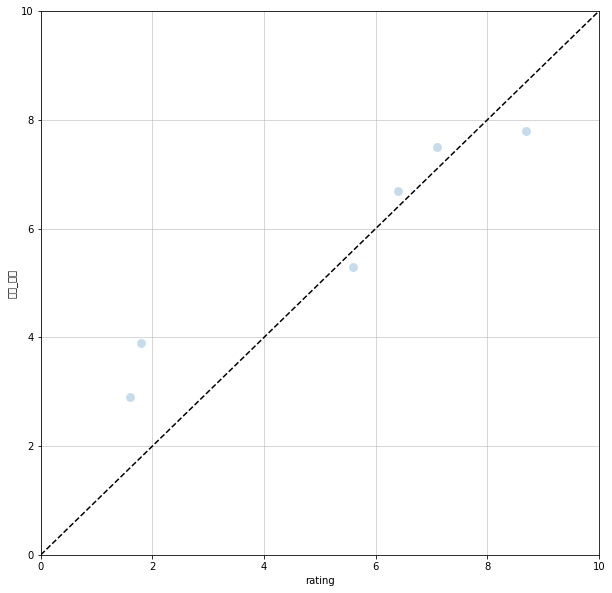

In [10]:
ax = df4.plot(x='rating', 
        y='评分_更新', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid(linewidth=0.5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

plt.savefig('only_popular_in_west_update.pdf')

In [11]:
df4

,genres,name,rating,ratingCount,imdb_link,评价人数_更新,评分_更新,index,电影名,评分,评价人数,链接,时间,演员
15,Adventure Comedy Romance,The Adventures of Buckaroo Banzai Across the 8...,6.4,18986,http://www.imdb.com/title/tt0086856,35,6.7,561,BuckarooBanzai跨越八次元空间大冒险,(评价人数不足),NaN,https://movie.douban.com/subject/1301795/,1984-08-15 00:00:00,"['彼得·威勒', '美国', 'W.D. 里克特 (W.D. Richter)', '10..."
169,Animation Action Adventure,Kôdo giasu: Hangyaku no rurûshu,8.7,31560,http://www.imdb.com/title/tt1459086,40,7.8,7519,反叛的鲁路修特典：开始的前夜最后的延期,(评价人数不足),NaN,https://movie.douban.com/subject/5167715/,2013-09-25 00:00:00,"['福山润', 'ゆかな', '水岛大宙', '大原沙耶香', '折笠富美子']"
340,Comedy Family,Saving Christmas,1.6,12799,http://www.imdb.com/title/tt4009460,38,2.9,16755,拯救圣诞,(评价人数不足),NaN,https://movie.douban.com/subject/25986365/,2014-11-14(美国),"['Bridgette Cameron', '柯克·卡梅隆', 'Darren Doane'..."
396,Comedy Family,Fuller House,7.1,16222,http://www.imdb.com/title/tt3986586,31,7.5,20267,欢乐再满屋第一季,(评价人数不足),NaN,https://movie.douban.com/subject/25978127/,2016-02-26(美国),"['朱迪·斯维汀', '坎达丝·卡梅隆·玻儿', '约翰·斯塔莫斯', '安德烈·巴伯', ..."
512,Horror Romance Thriller,Birdemic: Shock and Terror,1.8,15979,http://www.imdb.com/title/tt1316037,46,3.9,27818,群鸟：震惊和恐怖,(评价人数不足),NaN,https://movie.douban.com/subject/4293314/,Alan Bagh,"['Whitney Moore', 'Tippi Hedren', 'Janae Caste..."
533,Action Crime Drama,"No Retreat, No Surrender",5.6,12621,http://www.imdb.com/title/tt0089695,32,5.3,29575,血的游戏,(评价人数不足),NaN,https://movie.douban.com/subject/4890977/,Kurt McKinney,"['尚格·云顿', '美国', '香港', '元奎', '85分钟']"


## IMDb rating count  <  10, Douban < 50

In [143]:
df5 = df3_clean[df3_clean['ratingCount'] < 10]

In [145]:
df5['评分_更新'] = df5['评分_更新'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
df5 = df5[df5['评分_更新'] < 50]

In [147]:
df5.shape

(26, 14)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


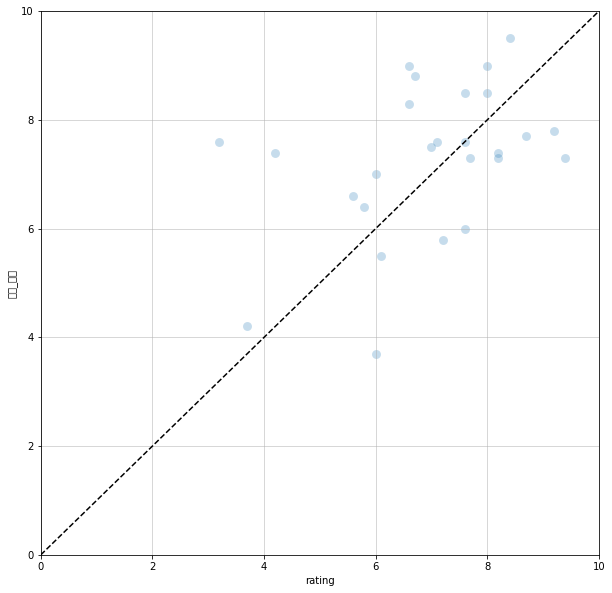

In [152]:
ax = df5.plot(x='rating', 
        y='评分_更新', 
        kind='scatter', 
        xlim=(0,10), 
        ylim=(0,10), 
        linewidth=0, 
        alpha=0.25,
        s=80,
        figsize=(10,10))
ax.grid(linewidth=0.5)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3", color='black')
#df[df.Continent == 'Africa'].plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', s=100, c='red', ax=ax)

plt.savefig('select_update.pdf')

In [149]:
df5

,genres,name,rating,ratingCount,imdb_link,评价人数_更新,评分_更新,index,电影名,评分,评价人数,链接,时间,演员
35,Drama,3-gatsu no raion kouhen,7.6,9,http://www.imdb.com/title/tt5556068,301,7.6,231,3月的狮子后篇,(尚未上映),NaN,https://movie.douban.com/subject/26748877/,2017-04-22(日本),"['神木隆之介', '佐佐木藏之介', '伊藤英明', '加濑亮', '仓科加奈']"
64,,Alan Titchmarsh's Garden Secrets,6.6,8,http://www.imdb.com/title/tt1830921,34,8.3,363,Alan的花园秘密,(评价人数不足),NaN,https://movie.douban.com/subject/25823598/,2010-09-09 00:00:00,"['Alan Titchmarsh', '英国', 'Alan Titchmarsh', '..."
792,Documentary,Tanks of Fury,8.0,6,http://www.imdb.com/title/tt4193964,73,8.5,1676,《狂怒》中的坦克,(评价人数不足),NaN,https://movie.douban.com/subject/26317705/,2014-11-09 00:00:00,"['大卫·阿耶', '布拉德·皮特', '希亚·拉博夫', '乔·博恩瑟', '迈克尔·佩纳']"
893,Drama Fantasy Romance,Ancient Love Song,6.0,5,http://www.imdb.com/title/tt6035380,7078,3.7,2293,上古情歌,(尚未上映),NaN,https://movie.douban.com/subject/26608231/,黄晓明,"['宋茜', '张俪', '盛一伦', '翟天临', '刘帅良']"
1037,Documentary Family,Nature's Miracle Orphans: Second Chances - Par...,8.4,8,http://www.imdb.com/title/tt5164450,125,9.5,3471,了不起的动物遗孤,(评价人数不足),NaN,https://movie.douban.com/subject/26851946/,Olga Merediz,"['英国', 'Will Ridgeon, Mark Wheeler', '了不起的动物遗孤..."
1858,Drama,Show Me Your Love,7.1,8,http://www.imdb.com/title/tt6405384,46,7.6,10234,大手牽小手,(评价人数不足),NaN,https://movie.douban.com/subject/26712235/,2016-11-24(香港),"['鲍起静', '黄浩然', '王菀之', '诗雅', '李枫']"
1882,Comedy,At School,6.6,8,http://www.imdb.com/title/tt5689594,27,9.0,10369,大英烦事多第二季,(评价人数不足),NaN,https://movie.douban.com/subject/26888729/,2016-05-09(英国),"['朱丽·沃特斯', 'Grace Dent', 'Josh Widdicombe', 'A..."
2013,Drama,The King of Romance,8.7,7,http://www.imdb.com/title/tt6413506,1686,7.7,11494,如朕亲临,(评价人数不足),NaN,https://movie.douban.com/subject/26907458/,2016-12-03(台湾),"['李国毅', '连俞涵', '蓝钧天', '房思瑜', '范宸菲']"
2616,Action,Shuriken Sentai Ninninja Tai Kamen Raidâ Dorai...,5.6,7,http://www.imdb.com/title/tt4561080,42,6.6,16540,手里剑战队忍忍者VS假面骑士Drive春假合体1小时特别篇,(评价人数不足),NaN,https://movie.douban.com/subject/26357790/,2015-03-29(日本),"['竹内涼真', '西川俊介', '日本', '中泽祥次郎', '手里剑战队忍忍者VS假面骑..."
2919,Romance,Hirunaka no ryuusei,9.4,5,http://www.imdb.com/title/tt6078842,71,7.3,18529,昼行闪耀的流星,(尚未上映),NaN,https://movie.douban.com/subject/26873577/,2017-03-24 00:00:00,"['永野芽郁', '三浦翔平', '白滨亚岚', '山本舞香', '佐藤隆太']"
